<a href="https://colab.research.google.com/github/gawankarsanket/dswithchirag_assignments/blob/main/Assignment_EDA_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df_train=pd.read_csv("/content/titanic_train.csv")
df_test=pd.read_csv("/content/titanic_test.csv")

#EDA

In [ ]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
df_train.shape

(891, 12)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#Number of people survived male Female

df_train.groupby(['Sex','Survived'])['PassengerId'].count()


Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: PassengerId, dtype: int64

In [ ]:
#Number of people survived at each class
df_train.groupby(['Pclass','Survived'])['PassengerId'].count()



Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: PassengerId, dtype: int64

In [ ]:
#Survival Ratio in Male passenger

Total_male_passegers=df_train[df_train['Sex'] == 'male']['PassengerId'].count()

survived_male_passengers=df_train[(df_train['Sex']=='male')&(df_train['Survived']==1)]['PassengerId'].count()

Survival_ratio_male=survived_male_passengers/Total_male_passegers
Survival_ratio_male




0.18890814558058924

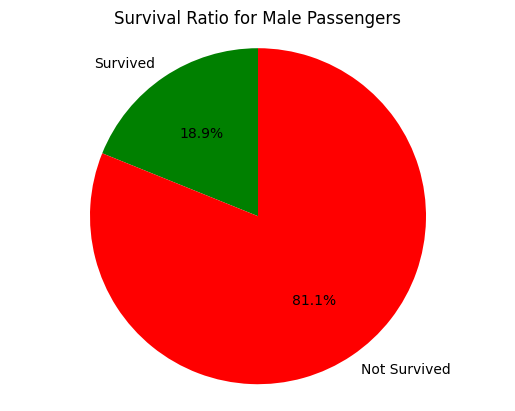

In [ ]:

# Your data
labels1 = ['Survived', 'Not Survived']
sizes1 = [Survival_ratio_male * 100, (1 - Survival_ratio_male) * 100]
colors1 = ['green', 'red']

# Plotting
plt.pie(sizes1, labels=labels1, colors=colors1, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
plt.title('Survival Ratio for Male Passengers')
plt.show()


In [ ]:
#Survival ration in Female passenger

Total_female_passegers=df_train[df_train['Sex']=='female']['PassengerId'].count()

survived_female_passengers=df_train[(df_train['Sex']=='female') & (df_train['Survived']==1)]['PassengerId'].count()

Survival_ratio_female=survived_female_passengers/Total_female_passegers

Survival_ratio_female


0.7420382165605095

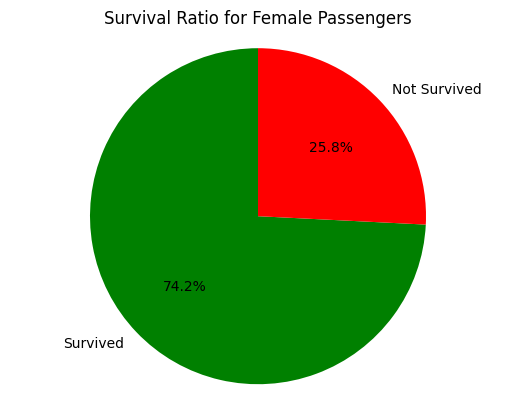

In [ ]:
# Your data
labels2 = ['Survived', 'Not Survived']
sizes2 = [Survival_ratio_female * 100, (1 - Survival_ratio_female) * 100]
colors2 = ['green', 'red']

# Plotting
plt.pie(sizes2, labels=labels2, colors=colors2, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
plt.title('Survival Ratio for Female Passengers')
plt.show()

In [ ]:
#Survival ration in Kids passenger

Total_kid_passegers=df_train[df_train['Age']<=18]['PassengerId'].count()

survived_kid_passengers=df_train[(df_train['Age']<=18) & (df_train['Survived']==1)]['PassengerId'].count()
survived_kid_passengers

Survival_ratio_kid=survived_kid_passengers/Total_kid_passegers

Survival_ratio_kid

0.5035971223021583

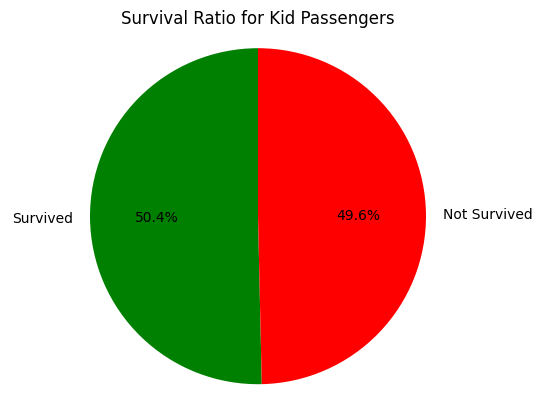

In [ ]:
# Your data
labels3 = ['Survived', 'Not Survived']
sizes3 = [Survival_ratio_kid* 100, (1 - Survival_ratio_kid) * 100]
colors3 = ['green', 'red']

# Plotting
plt.pie(sizes3, labels=labels3, colors=colors3, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
plt.title('Survival Ratio for Kid Passengers')
plt.show()

In [ ]:
#Total Survival Ratio

total_passengers=df_train['PassengerId'].count()

total_survived_passengers=df_train[df_train['Survived']==1]['PassengerId'].count()


Survival_ratio=total_survived_passengers/total_passengers
Survival_ratio


0.3838383838383838

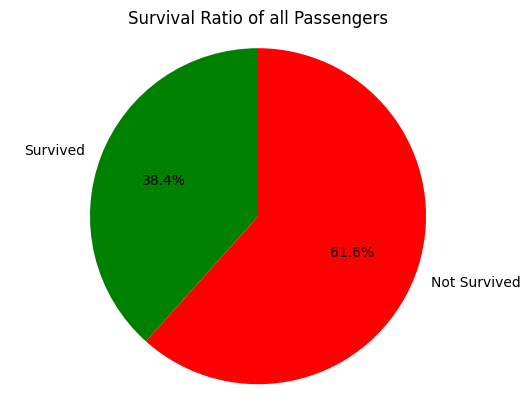

In [ ]:
# Your data
labels4 = ['Survived', 'Not Survived']
sizes4 = [Survival_ratio* 100, (1 - Survival_ratio) * 100]
colors4 = ['green', 'red']

# Plotting
plt.pie(sizes4, labels=labels4, colors=colors4, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
plt.title('Survival Ratio of all Passengers')
plt.show()

In [ ]:
#Survival and death count of passeger wrt their source station

df_train.groupby(['Embarked','Survived'])['PassengerId'].count()

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           217
Name: PassengerId, dtype: int64

## Prediction using ML algorithm

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df_train.shape

(891, 12)

In [ ]:
df_train.isnull().sum()  #There is null at age columns and Cabin. for Age we can fillna using avg value.
#Cabin 687 empty and also we can note remove 687 rows out of 891.
#SO better drop that column only

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

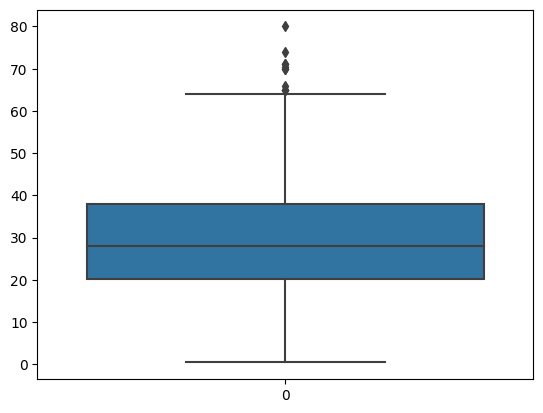

In [ ]:
#Before we fiil that, lets see if there is an outlier in Age  colunmns


sns.boxplot(df_train['Age'])

# We can see there are outlier in age col but these are valid age values.
#Keep them as it is and replace null with median

In [ ]:
 df_train['Age'].fillna(df_train['Age'].median(),inplace=True)

 df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

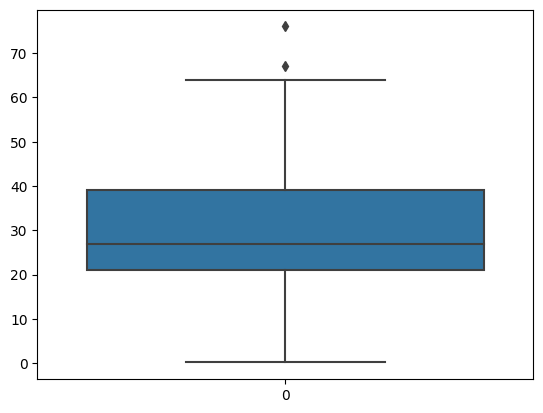

In [ ]:
#Check outliers in Test dataset age column
sns.boxplot(df_test['Age'])

In [ ]:
#Also apply the same to test dataset

df_test['Age'].fillna(df_test['Age'].median(),inplace=True)

df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
# Lets take relavant columns only.  NAME, CABIN, FARE are not relavant to survaival

x_train=df_train[['PassengerId','Pclass','Sex','Age','SibSp','Parch']]
y_train=df_train['Survived']

x_test=df_test[['PassengerId','Pclass','Sex','Age','SibSp','Parch']]

# y_test is what we need to predict.


x_train.shape,y_train.shape,x_test.shape

((891, 6), (891,), (418, 6))

In [ ]:
y_train.head() # No need to encode as values are 0s and 1s

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [ ]:
x_train.head()   #Sex column needs to be encoded. OHE.

,PassengerId,Pclass,Sex,Age,SibSp,Parch
0,1,3,male,22.0,1,0
1,2,1,female,38.0,1,0
2,3,3,female,26.0,0,0
3,4,1,female,35.0,1,0
4,5,3,male,35.0,0,0


## Automation

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder # OHE for input feature
from sklearn.preprocessing import StandardScaler # Normalise data
from sklearn.impute import SimpleImputer    # Handle missing value
from sklearn.compose import ColumnTransformer  #To apply  separate transformers for numerical and categorical data


In [ ]:
# Define separate list of columns as numeric and object

lst_num=[]
lst_cat=[]

for i in range(len(x_train.columns)):
  if x_train.dtypes[i]=='object':
    lst_cat.append(x_train.columns[i])

  else:
    lst_num.append(x_train.columns[i])

lst_num,lst_cat

(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch'], ['Sex'])

In [ ]:
## Feature Engg Automation

#Create pipeline to process Cat data and Num data.

num_pipeline=Pipeline(
    steps=[
        #('Imputer',SimpleImputer(strategy='mean')), #Handling missing values
        #Not needed as we have already handled mising values( age column)

        ('Scaling',StandardScaler()) ##Feature Scaling/Normalisation
    ]
)


cat_pipeline=Pipeline(
    steps=[
       # ('Imputer',SimpleImputer(strategy='most_frequent')), #Handling missing value
       ##Not needed as we have already handled mising values( age column)

        ('OHE',OneHotEncoder())  # Categorical to numeric
    ]
)

In [ ]:
preprocessor=ColumnTransformer([
    ('numpipeline',num_pipeline,lst_num),
    ('catpipeline',cat_pipeline,lst_cat)
])

preprocessor

ColumnTransformer(transformers=[('numpipeline',
                                 Pipeline(steps=[('Scaling',
                                                  StandardScaler())]),
                                 ['PassengerId', 'Pclass', 'Age', 'SibSp',
                                  'Parch']),
                                ('catpipeline',
                                 Pipeline(steps=[('OHE', OneHotEncoder())]),
                                 ['Sex'])])

In [ ]:
#Apply scaling , Imputation, encoding to x data as defined in pipeline >> Preprocessor
#as defined in


x_train=preprocessor.fit_transform(x_train)
x_test=preprocessor.transform(x_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

## Model Training Automation
models={
    'Random Forest':RandomForestClassifier(),
    'Decision Tree':DecisionTreeClassifier()

}

In [ ]:
from sklearn.metrics import accuracy_score


def evaluate_model (x_train,y_train,x_test,models):
  report={}
  for i in range(len(models)):
    model=list(models.values())[i]
    model.fit(x_train, y_train)


    preds=model.predict(x_test)


    report[list(models.keys())[i]] = preds



  return report


In [ ]:
Report=evaluate_model(x_train,y_train,x_test,models)

Report

{'Random Forest': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
        1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
        0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
        0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
        1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
        0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
        0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
        0, 1, 0, 0, 1

In [ ]:
#Add these report as column in Test dataframe


df_test_predicted= pd.concat([df_test, pd.DataFrame(Report)], axis=1)

df_test_predicted.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Random Forest,Decision Tree
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0


In [ ]:
# Just rename predcited columns

df_test_predicted.rename(columns={'Random Forest': 'Survival_Pred_by_RF', 'Decision Tree': 'Survival_Pred_by_DT'}, inplace=True)


df_test_predicted.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survival_Pred_by_RF,Survival_Pred_by_DT
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0
